In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import sys

module_path = 'code/' 
if module_path not in sys.path:
    sys.path.append(module_path)
from MM_Plot_Utils import plot, hist

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Single large action potential on each site
- The biggest action potentials available have size $S_{\rm{max}}$. 
- The smallest sortable action potentials have size $S_{\rm{min}}$. 
- The noise in split mode is $N_1 = \sqrt{N_{\rm{com}}^2+N_{\rm{pri}}^2}$.
- Spikes are sortable as long as 

$$S/N > S_{\rm{min}}/N_1$$

- For pooling we select electrodes that have a single spike of size $S_{\rm{max}}$ (most generous assumption).
- When $M$ electrodes are pooled, the signal becomes 

$$S_M = S_{\rm{max}} / M$$

and the noise becomes 

$$N_M = \sqrt{N_{\rm{com}}^2+N_{\rm{pri}}^2 / M}$$

- So pooling is effective as long as 

$$S_{\rm{max}} / M > S_{\rm{min}}/{N_1} \sqrt{N_{\rm{com}}^2+N_{\rm{pri}}^2 / M}$$ 

$$S_{\rm{max}} / S_{\rm{min}} > M \frac{\sqrt{N_{\rm{com}}^2+N_{\rm{pri}}^2}}{\sqrt{N_{\rm{com}}^2+N_{\rm{pri}}^2 / M}}$$ 

- From this find the maximal $M_{\rm{max}}$.

$$ {M_{{\text{max}}}} =  \sqrt {{{\left( {\frac{{{\beta ^2}}}{2}} \right)}^2} + {\alpha ^2}\left( {1 + {\beta ^2}} \right)} - \frac{{{\beta ^2}}}{2} $$

where

$$\alpha = \frac {S_{\text{max}}}{S_{\text{min}}}$$

and

$$\beta = \frac {N_{\text{pri}}}{N_{\text{com}}}$$

- We can pack $M_{\rm{max}}$ spikes onto one wire. But if $M$ goes beyond $M_{\rm{max}}$ all the spikes suddenly become unsortable.
- $M_{\rm{max}}$ is the max number of electrode pooled productively. It is also the factor increase of neurons/wire compared to split recording.

### Figure 2C

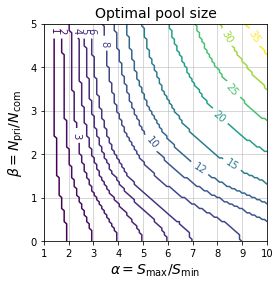

In [2]:
# Single large spike amplitude
xmin,xmax,nx = 1.01,10,90 # range of alpha
ymin,ymax,ny = 0,5,100 # range of beta
xv = np.linspace(xmin,xmax,nx)
yv = np.linspace(ymin,ymax,ny)
x,y = np.meshgrid(xv,yv)
v = np.floor(np.sqrt((y**2/2)**2+(1+y**2)*x**2)-(y**2/2)) # M_max
fig, axes = plt.subplots(figsize=(4,4))
ax=axes
CS0 = ax.contour(x,y,v,[1,2,3,4,5,6,8,10,12,15,20,25,30,35])
# ax.clabel(CS,inline=1,fontsize=10,fmt='%1.f',manual=[(2,0.5),(3.5,0.5),(6,.5)])
ax.clabel(CS0,inline=1,fontsize=10,fmt='%1.f')
ax.set_title('Optimal pool size',fontsize=14);
ax.set_xticks(np.arange(1,11));
ax.set_xlabel(r'$\alpha = S_{\mathrm{max}}/S_{\mathrm{min}}$', fontsize=14)
ax.set_ylabel(r'$\beta = N_{\mathrm{pri}}/N_{\mathrm{com}}$', fontsize=14)
ax.set_yticks(np.arange(6));
ax.grid(linewidth=0.5); # ,linestyle=':'
plt.savefig('figs/Single_Pool.pdf')

# Uniform distribution of spike amplitudes on each site

- Suppose spike amplitudes have uniform distribution from 0 to $S_{\rm{max}}$.
- Spikes above $S_{\rm{min}}$ are sortable in split mode
- Fraction of sortable spikes in split mode:
$${F_1} = \frac{{{S_{{\text{max}}}} - {S_{{\text{min}}}}}}{{{S_{{\text{max}}}}}}$$


After pooling $M$ sites we get

$${S_{{\text{max}},M}} = \frac{{{S_{{\text{max}}}}}}{M}$$

$${S_{{\text{min}},M}} = {S_{{\text{min}}}}\frac{{\sqrt {N_{{\text{com}}}^2 + N_{{\text{pri}}}^2/M} }}{{\sqrt {N_{{\text{com}}}^2 + N_{{\text{pri}}}^2} }} = {S_{{\text{min}}}}\frac{{\sqrt {1 + {\beta ^2}/M} }}{{\sqrt {1 + {\beta ^2}} }}$$

and the fraction sortable spikes is

$${F_M} = \frac{{{S_{{\text{max}},M}} - {S_{{\text{min}},M}}}}{{{S_{{\text{max}},M}}}} = 1 - \frac{M}{\alpha }\sqrt {\frac{{1 + {\beta ^2}/M}}{{1 + {\beta ^2}}}} $$

where

$$\alpha = \frac {S_{\text{max}}}{S_{\text{min}}}$$

and

$$\beta = \frac {N_{\text{pri}}}{N_{\text{com}}}$$

The factor increase in neurons per wire relative to a single split recording is

$$\frac {M \cdot {F_M}}{F_1} = \frac {M\left( {\alpha - M \sqrt {\frac{{1 + {\beta ^2}/M}}{{1 + {\beta ^2}}}} } \right)}{\alpha-1}$$

The optimal pool size $M_{\text{max}}$ is the $M$ which maximizes that factor.



In [3]:
def inc(m,al,be):
    '''
    returns increase in neurons per wire relative to split recording
    M = number of sites on wire
    al = alpha
    be = beta
    '''
    return m*(al-m*np.sqrt((1+be**2/m)/(1+be**2)))/(al-1)

### Figure 2D

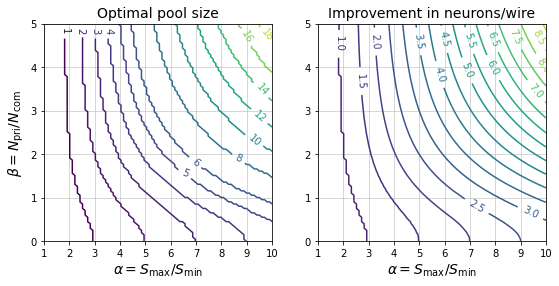

In [4]:
# Uniform distribution of spike amplitudes
xmin,xmax,nx = 1.01,10,90 # range of alpha
ymin,ymax,ny = 0,5,100 # range of beta
xv = np.linspace(xmin,xmax,nx)
yv = np.linspace(ymin,ymax,ny)
x,y = np.meshgrid(xv,yv)
m=np.arange(1,51)
z = np.array([[np.argmax(inc(m,x,y))+1 for x in xv] for y in yv]) # optimal pool size
w = inc(z,x,y) # increase in neurons/wire

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(9,4))
ax=axes[0]
CS0 = ax.contour(x,y,z,[1,2,3,4,5,6,8,10,12,14,16,18,20]) # contour values
# ax.clabel(CS,inline=1,fontsize=10,fmt='%1.f',manual=[(2,0.5),(3.5,0.5),(6,.5)])
ax.clabel(CS0,inline=1,fontsize=10,fmt='%1.f')
ax.set_title('Optimal pool size',fontsize=14);
ax.set_xticks(np.arange(1,11));
ax.set_xlabel(r'$\alpha = S_{\mathrm{max}}/S_{\mathrm{min}}$', fontsize=14)
ax.set_ylabel(r'$\beta = N_{\mathrm{pri}}/N_{\mathrm{com}}$', fontsize=14)
ax.set_yticks(np.arange(6));
ax.grid(linewidth=0.5); # ,linestyle=':'
ax=axes[1]
CS1 = ax.contour(x,y,w,np.linspace(0,10,21))
ax.clabel(CS1,inline=1,fontsize=10,fmt='%1.1f')
ax.set_title('Improvement in neurons/wire',fontsize=14);
ax.set_xticks(np.arange(1,11));
ax.set_xlabel(r'$\alpha = S_{\mathrm{max}}/S_{\mathrm{min}}$', fontsize=14)
ax.set_yticks(np.arange(6));
ax.grid(linewidth=0.5); # ,linestyle=':'
plt.savefig('figs/Uniform_Pool.pdf')

In our simulations we used the following numbers [source]:

- Largest spike amplitude V = 380 uV [from high end of amplitude distribution in Allen Inst database]
- Smallest sortable amplitude = 75 uV [our experience, also low end of amplitude distribution in AI database]
- electrode noise Nele = 1.6 uV [assuming ohmic bath impedance of 30 kohm. This was based on data from Probe 1, after use in brain experiemnts, where the resistors were all close to 30 kohm.]
- common noise Ncom = 5.7 uV [from msmts in saline, section 3.1 of paper]
- biological noise Nbio = 9 uV [from msmts in brain, section 3.3 of paper]


In [5]:
# using the numbers from our simulation
Smax = 380 # in uV
Smin = 75 # in uV 
Nele = 1.6 # in uV
Nbio = 9 # in uV
Ncom = 5.7 # in uV
al = Smax/Smin # alpha
be=np.sqrt(Nele**2+Nbio**2)/Ncom # beta
m=np.arange(1,51)
mmax=np.argmax(inc(m,al,be))+1 # optimal pool size
wmax=inc(mmax,al,be) # improvement in neurons/wire 
vmax=np.floor(np.sqrt((be**2/2)**2+(1+be**2)*al**2)-(be**2/2))
print('alpha = {:.2f}'.format(al))
print('beta = {:.2f}'.format(be))
print('\nUniform distribution of spikes:')
print('optimal pool size = {:.2f}'.format(mmax))
print('improvement in neurons/wire = {:.2f}'.format(wmax))
print('\nSingle large spike:')
print('optimal pool size = {:.2f}'.format(vmax))


alpha = 5.07
beta = 1.60

Uniform distribution of spikes:
optimal pool size = 4.00
improvement in neurons/wire = 2.32

Single large spike:
optimal pool size = 8.00


In [6]:
# electrode noise assuming various electrode resistances
def N_ele(R):
    '''
    Returns Johnson noise in uV RMS for resistance R in ohms
    '''
    kT = 4.1e-21 # kT in J
    f = 5000 # bandwidth in Hz
    return np.sqrt(4*kT*f*R)*1e6
     
for R in [1.5e5, 3e4, 1.3e4]: # electrode impedance in ohm
    print('{:3d} kohm: {} uV'.format(int(R/1000),round(N_ele(R),2)))

150 kohm: 3.51 uV
 30 kohm: 1.57 uV
 13 kohm: 1.03 uV
